In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My Drive/Applied_AI/train

Mounted at /gdrive
/gdrive/My Drive/Applied_AI/train


In [2]:
from scipy.io import loadmat
import numpy as np, os, sys, joblib
import matplotlib.pyplot as plt
import math
from tqdm import tqdm
import pandas as pd
import random
import tensorflow as tf
import sklearn
from collections import Counter

SEED = 1234
np.random.seed(SEED)
pd.core.common._random_stat = SEED
random.seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)

In [3]:
from sklearn.model_selection import train_test_split
import os
import re

In [4]:
path_to_data = "/gdrive/My Drive/Applied_AI/train"

In [5]:
def load_data(file):

  original = loadmat(file) #  dictionary with variable names as keys, and loaded matrices as values

  spk_file = file.replace('.mat', '_spk.mat')
  spk = loadmat(spk_file)

  ann_file = file.replace('.mat', '_ann.mat')
  ann = loadmat(ann_file)

  return original, spk, ann

In [6]:
def filter_files_by_pattern(directory, pattern):
    """
    Filter files in a directory based on a specified pattern.

    Parameters:
    - directory: The directory containing the files.
    - pattern: The regular expression pattern to match filenames.

    Returns:
    - List of filenames matching the pattern.
    """
    files = os.listdir(directory)
    filtered_files = [file for file in files if re.match(pattern, file)]
    return filtered_files

In [7]:
directory = path_to_data
pattern = r'S\d{3}_\d{3}\.mat'  # Regular expression pattern matching 'SXXX_YYY.mat'

filtered_files = filter_files_by_pattern(directory, pattern)
print(filtered_files)

['S120_250.mat', 'S117_250.mat', 'S108_250.mat', 'S110_250.mat', 'S114_250.mat', 'S106_250.mat', 'S112_250.mat', 'S115_250.mat', 'S121_250.mat', 'S113_250.mat', 'S109_250.mat', 'S116_250.mat', 'S102_250.mat', 'S111_250.mat', 'S119_250.mat', 'S091_250.mat', 'S098_250.mat', 'S118_250.mat', 'S104_250.mat', 'S101_250.mat', 'S087_250.mat', 'S100_250.mat', 'S096_250.mat', 'S084_250.mat', 'S093_250.mat', 'S095_250.mat', 'S092_250.mat', 'S103_250.mat', 'S088_250.mat', 'S097_250.mat', 'S099_250.mat', 'S105_250.mat', 'S094_250.mat', 'S058_128.mat', 'S046_128.mat', 'S054_128.mat', 'S049_128.mat', 'S039_128.mat', 'S061_128.mat', 'S082_250.mat', 'S060_128.mat', 'S083_250.mat', 'S055_128.mat', 'S059_128.mat', 'S052_128.mat', 'S044_128.mat', 'S079_250.mat', 'S048_128.mat', 'S041_128.mat', 'S090_250.mat', 'S062_128.mat', 'S086_250.mat', 'S053_128.mat', 'S081_250.mat', 'S057_128.mat', 'S089_250.mat', 'S080_250.mat', 'S085_250.mat', 'S042_128.mat', 'S043_128.mat', 'S051_128.mat', 'S015_128.mat', 'S020_1

In [8]:
train_files = filtered_files[:round(len(filtered_files)*0.8)]

In [9]:
train_files

['S120_250.mat',
 'S117_250.mat',
 'S108_250.mat',
 'S110_250.mat',
 'S114_250.mat',
 'S106_250.mat',
 'S112_250.mat',
 'S115_250.mat',
 'S121_250.mat',
 'S113_250.mat',
 'S109_250.mat',
 'S116_250.mat',
 'S102_250.mat',
 'S111_250.mat',
 'S119_250.mat',
 'S091_250.mat',
 'S098_250.mat',
 'S118_250.mat',
 'S104_250.mat',
 'S101_250.mat',
 'S087_250.mat',
 'S100_250.mat',
 'S096_250.mat',
 'S084_250.mat',
 'S093_250.mat',
 'S095_250.mat',
 'S092_250.mat',
 'S103_250.mat',
 'S088_250.mat',
 'S097_250.mat',
 'S099_250.mat',
 'S105_250.mat',
 'S094_250.mat',
 'S058_128.mat',
 'S046_128.mat',
 'S054_128.mat',
 'S049_128.mat',
 'S039_128.mat',
 'S061_128.mat',
 'S082_250.mat',
 'S060_128.mat',
 'S083_250.mat',
 'S055_128.mat',
 'S059_128.mat',
 'S052_128.mat',
 'S044_128.mat',
 'S079_250.mat',
 'S048_128.mat',
 'S041_128.mat',
 'S090_250.mat',
 'S062_128.mat',
 'S086_250.mat',
 'S053_128.mat',
 'S081_250.mat',
 'S057_128.mat',
 'S089_250.mat',
 'S080_250.mat',
 'S085_250.mat',
 'S042_128.mat

In [10]:
validation_files = filtered_files[(round(len(filtered_files)*0.8)):]

In [11]:
validation_files

['S028_128.mat',
 'S027_128.mat',
 'S037_128.mat',
 'S019_128.mat',
 'S047_128.mat',
 'S033_128.mat',
 'S007_128.mat',
 'S016_128.mat',
 'S013_128.mat',
 'S005_128.mat',
 'S003_128.mat',
 'S011_128.mat',
 'S001_128.mat',
 'S004_128.mat',
 'S009_128.mat',
 'S006_128.mat',
 'S002_128.mat',
 'S017_128.mat',
 'S056_128.mat',
 'S012_128.mat',
 'S008_128.mat']

In [12]:
train = []
ecg_train = []
spk_train = []
ann_train = []

for file in train_files:
  ecg, spk, ann = load_data(path_to_data + '/' + file)
  ecg_train.append(ecg)
  spk_train.append(spk)
  ann_train.append(ann)

  train.append(path_to_data + '/' + file)

In [13]:
validation = []
ecg_validation = []
spk_validation = []
ann_validation = []

for file in validation_files:

  ecg, spk, ann = load_data(path_to_data + '/' + file)
  ecg_validation.append(ecg)
  spk_validation.append(spk)
  ann_validation.append(ann)

  validation.append(path_to_data + '/' + file)

In [14]:
! pip install neurokit2 tdqm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for tdqm: filename=tdqm-0.0.1-py3-none-any.whl size=1323 sha256=fb4654f34ed22208c90c5b8f4f5931e0f897c52ddb777df76f3a067fb1ad29f0
  Stored in directory: /root/.cache/pip/wheels/37/31/b8/7b711038035720ba0df14376af06e5e76b9bd61759c861ad92
Successfully built tdqm


In [15]:
def freq(filename):
  if '128' in filename:
    return 128
  else:
    return 250

(-5.0, 5.0)

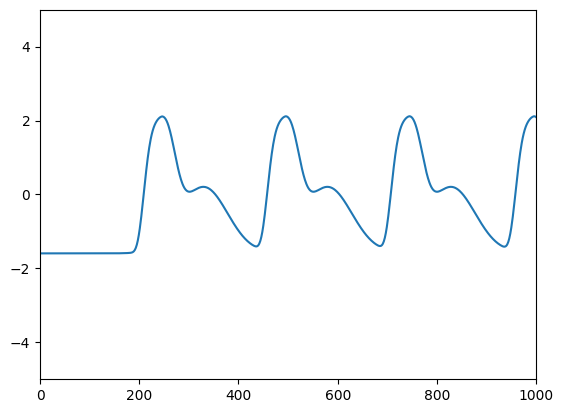

In [16]:

import matplotlib.pyplot as plt

# plot a piece of one ECG signal
plt.plot(ecg_train[1]['ppg'][:,0])
plt.xlim(0,1000)
plt.ylim(-5,5)

In [17]:
# Utility: given the filename of a signal it returns the sampling frequency
def ecg_freq(filename):
  if '128' in filename:
    return 128
  else:
    return 250

In [18]:
import scipy

In [19]:
# Resample to 250 Hz training ECG signals

resampled_ecg_1_train = []
#resampled_ecg_2_train = []
for i in range(len(ecg_train)):
   secs_1 = len(ecg_train[i]['ppg'][:,0])/ecg_freq(train[i]) # Number of seconds in signal X
   #secs_2 = len(ecg_train[i]['ppg'][:,1])/ecg_freq(train[i]) # Number of seconds in signal X
   samps_1 = secs_1*250     # Number of samples to downsample
   #samps_2 = secs_2*250
   resampled_ecg_1_train.append(scipy.signal.resample(ecg_train[i]['ppg'][:,0] , int(samps_1)))
   #resampled_ecg_2_train.append(scipy.signal.resample(ecg_train[i]['ppg'][:,1] , int(samps_2)))

In [20]:

# Resample to 250 Hz validation ECG signals

resampled_ecg_1_validation = []
#resampled_ecg_2_validation = []
for i in range(len(ecg_validation)):
   secs_1 = len(ecg_validation[i]['ppg'][:,0])/ecg_freq(validation[i]) # Number of seconds in signal X
   #secs_2 = len(ecgs_validation[i]['ecg'][:,1])/ecg_freq(filenames_validation[i]) # Number of seconds in signal X
   samps_1 = secs_1*250     # Number of samples to downsample
   #samps_2 = secs_2*250
   resampled_ecg_1_validation.append(scipy.signal.resample(ecg_validation[i]['ppg'][:,0] , int(samps_1)))
   #resampled_ecg_2_validation.append(scipy.signal.resample(ecgs_validation[i]['ecg'][:,1] , int(samps_2)))

128

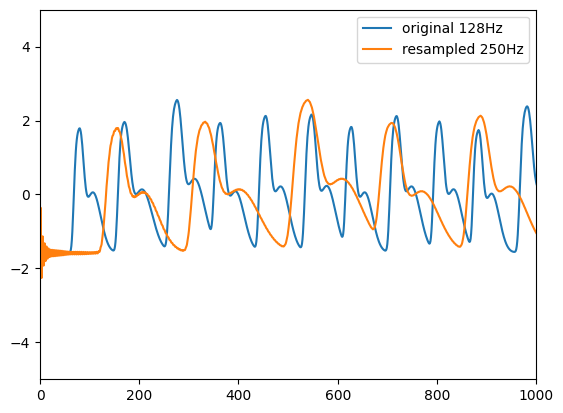

In [21]:
# look the effect of signal resampling
beat = 50
plt.plot(ecg_train[beat]['ppg'][:,0])
plt.plot(resampled_ecg_1_train[beat])
plt.legend(['original 128Hz', 'resampled 250Hz'])
plt.xlim(0, 1000)
plt.ylim(-5,5)

ecg_freq(train[beat])

In [22]:
# Use firwin with a Kaiser window to create a lowpass FIR filter.
taps = scipy.signal.firwin(12, 100/125, fs = 250)


In [23]:
len(resampled_ecg_1_train)

84

In [24]:
len(resampled_ecg_1_validation)

21

In [25]:
mf600 = int(250 * 0.6) - 1
mf200 = int(250 * 0.2) - 1
for i in range(len(resampled_ecg_1_train)):
  resampled_ecg_1_train[i] = scipy.signal.lfilter(taps, 1.0, resampled_ecg_1_train[i] - scipy.signal.medfilt(scipy.signal.medfilt(resampled_ecg_1_train[i], mf200), mf600))
  #resampled_ecg_2_train[i] = scipy.signal.lfilter(taps, 1.0, resampled_ecg_2_train[i] - scipy.signal.medfilt(scipy.signal.medfilt(resampled_ecg_2_train[i], mf200), mf600))


for i in range(len(resampled_ecg_1_validation)):
  resampled_ecg_1_validation[i] = scipy.signal.lfilter(taps, 1.0, resampled_ecg_1_validation[i] - scipy.signal.medfilt(scipy.signal.medfilt(resampled_ecg_1_validation[i], mf200), mf600))
  #resampled_ecg_2_validation[i] = scipy.signal.lfilter(taps, 1.0, resampled_ecg_2_validation[i] - scipy.signal.medfilt(scipy.signal.medfilt(resampled_ecg_2_validation[i], mf200), mf600))


128

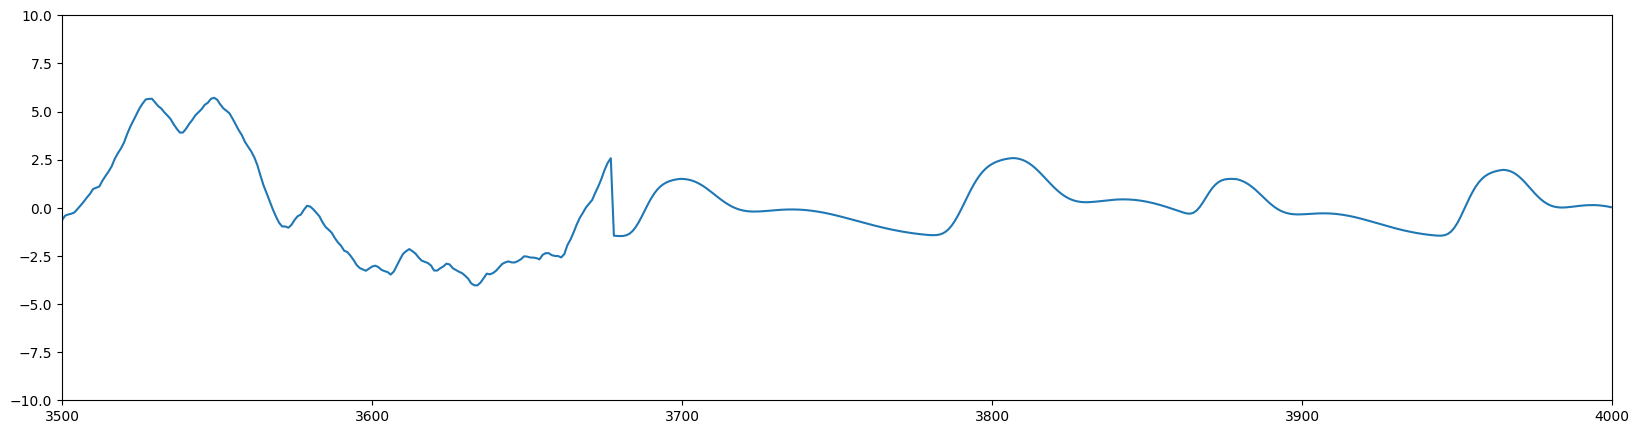

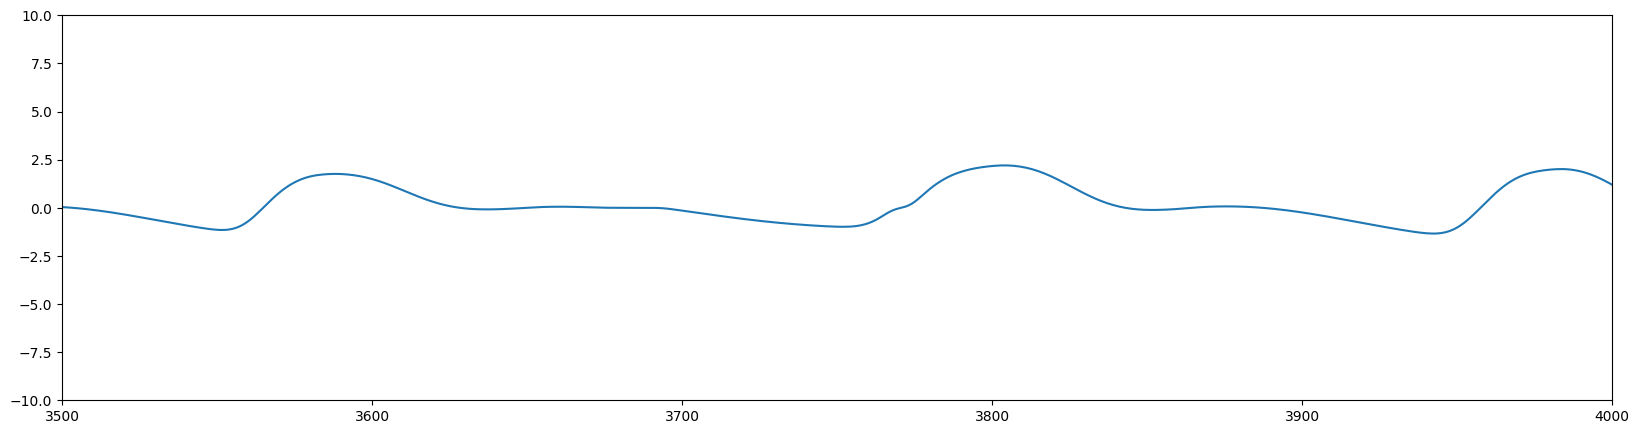

In [26]:
# plot the effect of the denoising procedure showing a piece of ECG before and after the applications of filters

x = 50
plt.figure(figsize=(20, 5))
plt.plot(ecg_train[x]['ppg'][:,0])
plt.xlim(3500, 4000)
plt.ylim(-10,10)
plt.figure(figsize=(20, 5))
plt.plot(resampled_ecg_1_train[x])
plt.xlim(3500, 4000)
plt.ylim(-10,10)
ecg_freq(train[x])


In [27]:
spk_train[0]['speaks']

array([[   211],
       [   430],
       [   633],
       ...,
       [449512],
       [449709],
       [449911]], dtype=int32)

In [28]:
def from_freq_to_freq(sample, ini_freq, freq = 250):
   secs = sample/ini_freq # Number of seconds in signal X
   samp = secs*freq       # Number of samples to downsample
   return int(samp)

In [29]:
# This parameter is the number of samples considered to segment the ECG signal (the segment will be the samples of current R peak +/- win)

win = 250

In [30]:
# Extract all the segments (single heartbeats) from the original raw signals

heartbeats_train_1 = []
#heartbeats_train_2 = []
heartbeats_validation_1 = []
#heartbeats_validation_2 = []

for i in range(len(ecg_train)):
  for j in range(len(spk_train[i]['speaks'])):
   if(from_freq_to_freq(spk_train[i]['speaks'][j],ecg_freq(train[i])) < win or from_freq_to_freq(spk_train[i]['speaks'][j],ecg_freq(train[i]))  + win > from_freq_to_freq(spk_train[i]['speaks'][-1],ecg_freq(train[i])) or j < 40 or (len(spk_train[i]['speaks']) - (j+1) < 40)): #skipping beats that are too much close to the initial and to the end of the signal
    ann_train[i]['labels'][j] = 'A'
    spk_train[i]['speaks'][j] = 0
   else:
    heartbeats_train_1.append(resampled_ecg_1_train[i][from_freq_to_freq(spk_train[i]['speaks'][j],ecg_freq(train[i]))  - win : from_freq_to_freq(spk_train[i]['speaks'][j],ecg_freq(train[i]))  + win])
    #heartbeats_train_2.append(resampled_ecg_2_train[i][from_freq_to_freq(rpks_train[i]['rpeaks'][j],ecg_freq(filenames_train[i]))  - win : from_freq_to_freq(rpks_train[i]['rpeaks'][j],ecg_freq(filenames_train[i]))  + win])

for i in range(len(ecg_validation)):
  for j in range(len(spk_validation[i]['speaks'])):
   if(from_freq_to_freq(spk_validation[i]['speaks'][j],ecg_freq(validation[i])) < win or from_freq_to_freq(spk_validation[i]['speaks'][j],ecg_freq(validation[i])) + win > from_freq_to_freq(spk_validation[i]['speaks'][-1],ecg_freq(validation[i]))): #skipping beats that are too much close to the initial and to the end of the signal
    ann_validation[i]['labels'][j] = 'A'
    spk_validation[i]['speaks'][j] = 0
   else:
    heartbeats_validation_1.append(resampled_ecg_1_validation[i][from_freq_to_freq(spk_validation[i]['speaks'][j],ecg_freq(validation[i]))  - win : from_freq_to_freq(spk_validation[i]['speaks'][j],ecg_freq(validation[i]))  + win])
    #heartbeats_validation_2.append(resampled_ecg_2_validation[i][from_freq_to_freq(rpks_validation[i]['rpeaks'][j],ecg_freq(filenames_validation[i]))  - win : from_freq_to_freq(rpks_validation[i]['rpeaks'][j],ecg_freq(filenames_validation[i]))  + win])


<ipython-input-28-ead6d838464d>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return int(samp)


In [31]:
len(spk_train[0]['speaks']), len(np.delete(spk_train[0]['speaks'], 0))

(1890, 1889)

In [32]:
len(heartbeats_train_1), len(heartbeats_validation_1)

(191294, 48543)

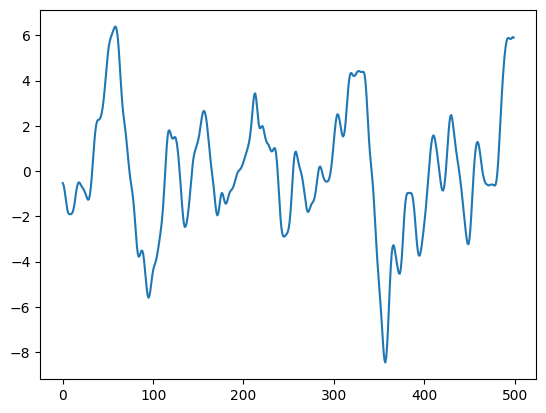

In [33]:
import matplotlib.pyplot as plt

# plot an example of segment
plt.plot(heartbeats_train_1[150])

In [34]:
labels_train = []
labels_validation = []

for i in range(len(ecg_train)):
  for j in range(len(ann_train[i]['labels'])):
    if(ann_train[i]['labels'][j] != 'A'):
     labels_train.append(ann_train[i]['labels'][j])

for i in range(len(ecg_validation)):
  for j in range(len(ann_validation[i]['labels'])):
    if(ann_validation[i]['labels'][j] != 'A'):
     labels_validation.append(ann_validation[i]['labels'][j])


In [35]:
classes_name = ['N', 'S', 'V']

In [36]:
len(labels_train), len(heartbeats_train_1)

(191294, 191294)

In [37]:
len(labels_validation), len(heartbeats_validation_1)

(48543, 48543)

In [38]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(labels_train)

#One hot encoding of the target values
ohe = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
target_ohe_train = ohe.fit_transform(integer_encoded)

integer_encoded = label_encoder.fit_transform(labels_validation)

#One hot encoding of the target values
ohe = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
target_ohe_validation = ohe.fit_transform(integer_encoded)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [39]:
label_encoder.inverse_transform([0,1,2])

array(['N', 'S', 'V'], dtype='<U1')

In [40]:
ohe.inverse_transform([[1, 0, 0], [0,1,0], [0,0,1]])

array([[0],
       [1],
       [2]])

In [41]:
y_train = target_ohe_train
y_val = target_ohe_validation

In [42]:
X_train_1 = tf.keras.preprocessing.sequence.pad_sequences(heartbeats_train_1, maxlen=win * 2, dtype='float32', truncating='post',padding="post")
#X_train_2 = tf.keras.preprocessing.sequence.pad_sequences(heartbeats_train_2, maxlen=win * 2, dtype='float32', truncating='post',padding="post")
X_val_1 = tf.keras.preprocessing.sequence.pad_sequences(heartbeats_validation_1, maxlen=win * 2, dtype='float32', truncating='post',padding="post")
#X_val_2 = tf.keras.preprocessing.sequence.pad_sequences(heartbeats_validation_2, maxlen=win * 2, dtype='float32', truncating='post',padding="post")


In [43]:
y_train.shape

(191294, 3)

In [44]:
X_train_1.shape

(191294, 500)

In [45]:
X_train = []
for i in range(len(X_train_1)):
  X_train.append(X_train_1[i])

X_train = np.asarray(X_train)

In [46]:

X_val = []
for i in range(len(X_val_1)):
  X_val.append(X_val_1[i])

X_val = np.asarray(X_val)

(191294, 500)

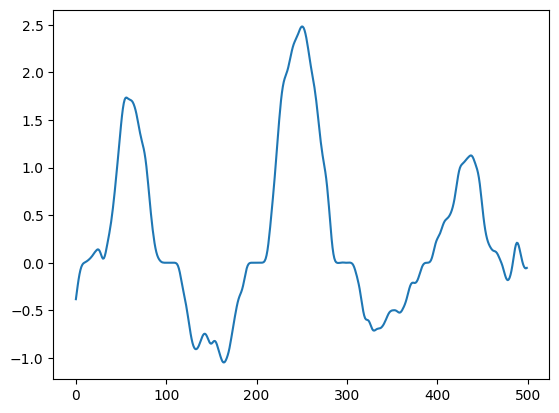

In [47]:
plt.plot(X_train[900])

X_train.shape


In [48]:
X_train = np.asarray(X_train_1)
X_val = np.asarray(X_val_1)


In [49]:
# Normalize data (used for resnet, not for vgg)
mean = np.mean(X_train, axis=1).mean(axis=0)
std = np.std(X_train, axis=1).mean(axis=0)

X_train = (X_train - mean)/std
X_val = (X_val - mean)/std

mean, std

(0.05635994, 2.5021503)

In [50]:
len(X_train), len(X_train > 3)

(191294, 191294)

'N'

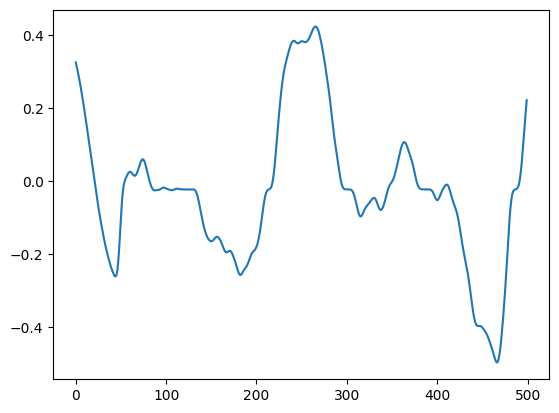

In [51]:
import matplotlib.pyplot as plt

beat = 10000
plt.plot(X_train[beat])
labels_train[beat]


In [52]:
y_l = y_train.tolist()
len([i for i in y_l if i == [1,0,0]]), len([i for i in y_l if i == [0,1,0]]), len([i for i in y_l if i == [0,0,1]])

(178168, 7402, 5724)

In [53]:
import sklearn
X_train, y_train = sklearn.utils.shuffle(X_train, y_train)


In [54]:
# Considering class imbalance: class weightning to reduce the bias in the dataset

from sklearn.utils.class_weight import compute_class_weight

y_integers = np.argmax(y_train, axis=1)

class_weights = compute_class_weight(
                                      class_weight = "balanced",
                                      classes = np.unique(y_integers),
                                      y = y_integers
                                    )

class_weights = dict(zip(np.unique(y_integers), class_weights))
class_weights


{0: 0.3578906799574933, 1: 8.61451859857696, 2: 11.139878872583274}

In [55]:
X_train.shape, y_train.shape

((191294, 500), (191294, 3))

In [56]:
#class weights for validation set
from sklearn.utils.class_weight import compute_class_weight

y_integers = np.argmax(y_val, axis=1)

class_weights_val = compute_class_weight(
                                      class_weight = "balanced",
                                      classes = np.unique(y_integers),
                                      y = y_integers
                                    )

In [57]:
class_weights_val

array([0.36476555, 7.6759962 , 7.79807229])

In [58]:
decode = dict(N =  0, S = 1, V  = 2)

In [59]:
samples_class_weights = []
for y in y_val:
  samples_class_weights.append(class_weights_val[ohe.inverse_transform([y])[0][0]])

In [73]:
# Here we load validation data, training data can be loaded with the batch generator below

train_data = tf.data.Dataset.from_tensor_slices((X_train, y_train))
validation_data = tf.data.Dataset.from_tensor_slices((X_val, y_val, samples_class_weights))


In [80]:
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.metrics import confusion_matrix

#utility to plot confusion matrix and evaluation metrics
def evaluate_on_valid(model, batch_size, valid_to_use):
  #Computing the prediction of the model on the validation set
  predictions = []
  for element in valid_to_use.batch(batch_size).as_numpy_iterator():
      predictions.append(model.predict(element[0]))

  predictions_f = [item for sublist in predictions for item in sublist]

  predictions_oh = []
  #transform prediction into one-hot-encoding
  for i in range(len(predictions_f)):
      predictions_oh.append(tf.one_hot(tf.argmax(predictions_f[i]), depth=3))

  #Compute the true and prediction array in order to plot the confusion matrix
  y = []

  for y_t in y_val.tolist():
      if(y_t == [1, 0, 0]):
          y.append('N')
      if(y_t == [0, 1 ,0]):
          y.append('S')
      if(y_t == [0, 0 ,1]):
          y.append('V')

  y_pred = []

  for y_t in predictions_oh:
      if(all(tf.equal(y_t, tf.constant([1, 0, 0], dtype=np.float32)))):
          y_pred.append('N')
      elif(all(tf.equal(y_t, tf.constant([0, 1, 0], dtype=np.float32)))):
          y_pred.append('S')
      elif(all(tf.equal(y_t, tf.constant([0, 0, 1], dtype=np.float32)))):
          y_pred.append('V')
      else:
          print(y_t)

  # Plot confusion matrix and metrics
  ConfusionMatrixDisplay.from_predictions(y, y_pred, labels = ['N', 'S', 'V'])
  ConfusionMatrixDisplay.from_predictions(y, y_pred, normalize='true', labels = ['N', 'S', 'V'])

  print(classification_report(y,y_pred))

In [75]:
import tensorflow as tf

# Assuming win is defined somewhere earlier in your code
win = 250

# Define the seed for reproducibility
SEED = 42

vgg = tf.keras.Sequential()

vgg.add(tf.keras.layers.Conv1D(input_shape=(500, 1), filters=32, kernel_size=3, padding="same", activation="relu", kernel_initializer=tf.keras.initializers.GlorotUniform(SEED)))
vgg.add(tf.keras.layers.Conv1D(filters=32, kernel_size=3, padding="same", activation="relu", kernel_initializer=tf.keras.initializers.GlorotUniform(SEED)))
vgg.add(tf.keras.layers.MaxPooling1D(pool_size=2, strides=2))
vgg.add(tf.keras.layers.Conv1D(filters=64, kernel_size=3, padding="same", activation="relu", kernel_initializer=tf.keras.initializers.GlorotUniform(SEED)))
vgg.add(tf.keras.layers.Conv1D(filters=64, kernel_size=3, padding="same", activation="relu", kernel_initializer=tf.keras.initializers.GlorotUniform(SEED)))
vgg.add(tf.keras.layers.MaxPooling1D(pool_size=2, strides=2))
vgg.add(tf.keras.layers.Conv1D(filters=128, kernel_size=3, padding="same", activation="relu", kernel_initializer=tf.keras.initializers.GlorotUniform(SEED)))
vgg.add(tf.keras.layers.Conv1D(filters=128, kernel_size=3, padding="same", activation="relu", kernel_initializer=tf.keras.initializers.GlorotUniform(SEED)))
vgg.add(tf.keras.layers.Conv1D(filters=128, kernel_size=3, padding="same", activation="relu", kernel_initializer=tf.keras.initializers.GlorotUniform(SEED)))
vgg.add(tf.keras.layers.MaxPooling1D(pool_size=2, strides=2))
vgg.add(tf.keras.layers.Conv1D(filters=256, kernel_size=3, padding="same", activation="relu", kernel_initializer=tf.keras.initializers.GlorotUniform(SEED)))
vgg.add(tf.keras.layers.Conv1D(filters=256, kernel_size=3, padding="same", activation="relu", kernel_initializer=tf.keras.initializers.GlorotUniform(SEED)))
vgg.add(tf.keras.layers.Conv1D(filters=256, kernel_size=3, padding="same", activation="relu", kernel_initializer=tf.keras.initializers.GlorotUniform(SEED)))
vgg.add(tf.keras.layers.MaxPooling1D(pool_size=2, strides=2))
vgg.add(tf.keras.layers.Conv1D(filters=256, kernel_size=3, padding="same", activation="relu", kernel_initializer=tf.keras.initializers.GlorotUniform(SEED)))
vgg.add(tf.keras.layers.Conv1D(filters=256, kernel_size=3, padding="same", activation="relu", kernel_initializer=tf.keras.initializers.GlorotUniform(SEED)))
vgg.add(tf.keras.layers.Conv1D(filters=256, kernel_size=3, padding="same", activation="relu", kernel_initializer=tf.keras.initializers.GlorotUniform(SEED)))
vgg.add(tf.keras.layers.MaxPooling1D(pool_size=2, strides=2))
vgg.add(tf.keras.layers.Flatten())
vgg.add(tf.keras.layers.Dense(128, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(SEED)))
vgg.add(tf.keras.layers.Dropout(0.3, seed=SEED))
vgg.add(tf.keras.layers.Dense(3, activation='softmax'))

vgg.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-6),
    loss='categorical_crossentropy',
    metrics=['accuracy',
             tf.keras.metrics.Precision(class_id=0),
             tf.keras.metrics.Recall(class_id=0),
             tf.keras.metrics.Precision(class_id=1),
             tf.keras.metrics.Recall(class_id=1),
             tf.keras.metrics.Precision(class_id=2),
             tf.keras.metrics.Recall(class_id=2)]
)

In [84]:
vgg.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_13 (Conv1D)          (None, 500, 32)           128       
                                                                 
 conv1d_14 (Conv1D)          (None, 500, 32)           3104      
                                                                 
 max_pooling1d_5 (MaxPoolin  (None, 250, 32)           0         
 g1D)                                                            
                                                                 
 conv1d_15 (Conv1D)          (None, 250, 64)           6208      
                                                                 
 conv1d_16 (Conv1D)          (None, 250, 64)           12352     
                                                                 
 max_pooling1d_6 (MaxPoolin  (None, 125, 64)           0         
 g1D)                                                 

In [76]:
history = vgg.fit(train_data.batch(32),
    validation_data=validation_data.batch(32),
    shuffle= True,
    epochs = 10,
    callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=5, restore_best_weights=True),
).history #10 epoche

Epoch 1/10
5974/5978 [============================>.] - ETA: 0s - loss: 0.4326 - accuracy: 0.9299 - precision_3: 0.9315 - recall_3: 0.8886 - precision_4: 0.0000e+00 - recall_4: 0.0000e+00 - precision_5: 0.0000e+00 - recall_5: 0.0000e+00

5978/5978 [==============================] - 82s 13ms/step - loss: 0.4325 - accuracy: 0.9299 - precision_3: 0.9315 - recall_3: 0.8887 - precision_4: 0.0000e+00 - recall_4: 0.0000e+00 - precision_5: 0.0000e+00 - recall_5: 0.0000e+00 - val_loss: 2.3128 - val_accuracy: 0.9138 - val_precision_3: 0.9138 - val_recall_3: 1.0000 - val_precision_4: 0.0000e+00 - val_recall_4: 0.0000e+00 - val_precision_5: 0.0000e+00 - val_recall_5: 0.0000e+00
Epoch 2/10
5976/5978 [============================>.] - ETA: 0s - loss: 0.3009 - accuracy: 0.9314 - precision_3: 0.9314 - recall_3: 1.0000 - precision_4: 0.0000e+00 - recall_4: 0.0000e+00 - precision_5: 0.0000e+00 - recall_5: 0.0000e+00

5978/5978 [==============================] - 77s 13ms/step - loss: 0.3009 - accuracy: 0.9314 - precision_3: 0.9314 - recall_3: 1.0000 - precision_4: 0.0000e+00 - recall_4: 0.0000e+00 - precision_5: 0.0000e+00 - recall_5: 0.0000e+00 - val_loss: 2.2487 - val_accuracy: 0.9138 - val_precision_3: 0.9138 - val_recall_3: 1.0000 - val_precision_4: 0.0000e+00 - val_recall_4: 0.0000e+00 - val_precision_5: 0.0000e+00 - val_recall_5: 0.0000e+00
Epoch 3/10
5977/5978 [============================>.] - ETA: 0s - loss: 0.2955 - accuracy: 0.9314 - precision_3: 0.9314 - recall_3: 1.0000 - precision_4: 0.0000e+00 - recall_4: 0.0000e+00 - precision_5: 0.0000e+00 - recall_5: 0.0000e+00

5978/5978 [==============================] - 76s 13ms/step - loss: 0.2955 - accuracy: 0.9314 - precision_3: 0.9314 - recall_3: 1.0000 - precision_4: 0.0000e+00 - recall_4: 0.0000e+00 - precision_5: 0.0000e+00 - recall_5: 0.0000e+00 - val_loss: 2.2037 - val_accuracy: 0.9138 - val_precision_3: 0.9138 - val_recall_3: 1.0000 - val_precision_4: 0.0000e+00 - val_recall_4: 0.0000e+00 - val_precision_5: 0.0000e+00 - val_recall_5: 0.0000e+00
Epoch 4/10
5978/5978 [==============================] - ETA: 0s - loss: 0.2888 - accuracy: 0.9314 - precision_3: 0.9314 - recall_3: 1.0000 - precision_4: 0.0000e+00 - recall_4: 0.0000e+00 - precision_5: 0.0000e+00 - recall_5: 0.0000e+00

5978/5978 [==============================] - 78s 13ms/step - loss: 0.2888 - accuracy: 0.9314 - precision_3: 0.9314 - recall_3: 1.0000 - precision_4: 0.0000e+00 - recall_4: 0.0000e+00 - precision_5: 0.0000e+00 - recall_5: 0.0000e+00 - val_loss: 2.1240 - val_accuracy: 0.9138 - val_precision_3: 0.9138 - val_recall_3: 1.0000 - val_precision_4: 0.0000e+00 - val_recall_4: 0.0000e+00 - val_precision_5: 0.0000e+00 - val_recall_5: 0.0000e+00
Epoch 5/10
5978/5978 [==============================] - ETA: 0s - loss: 0.2727 - accuracy: 0.9314 - precision_3: 0.9314 - recall_3: 0.9999 - precision_4: 0.0000e+00 - recall_4: 0.0000e+00 - precision_5: 0.0000e+00 - recall_5: 0.0000e+00

5978/5978 [==============================] - 83s 14ms/step - loss: 0.2727 - accuracy: 0.9314 - precision_3: 0.9314 - recall_3: 0.9999 - precision_4: 0.0000e+00 - recall_4: 0.0000e+00 - precision_5: 0.0000e+00 - recall_5: 0.0000e+00 - val_loss: 1.9336 - val_accuracy: 0.9137 - val_precision_3: 0.9140 - val_recall_3: 0.9998 - val_precision_4: 0.0000e+00 - val_recall_4: 0.0000e+00 - val_precision_5: 0.0000e+00 - val_recall_5: 0.0000e+00
Epoch 6/10
5977/5978 [============================>.] - ETA: 0s - loss: 0.2490 - accuracy: 0.9318 - precision_3: 0.9342 - recall_3: 0.9988 - precision_4: 0.0000e+00 - recall_4: 0.0000e+00 - precision_5: 0.0000e+00 - recall_5: 0.0000e+00

5978/5978 [==============================] - 83s 14ms/step - loss: 0.2490 - accuracy: 0.9318 - precision_3: 0.9342 - recall_3: 0.9988 - precision_4: 0.0000e+00 - recall_4: 0.0000e+00 - precision_5: 0.0000e+00 - recall_5: 0.0000e+00 - val_loss: 1.8123 - val_accuracy: 0.9178 - val_precision_3: 0.9273 - val_recall_3: 0.9954 - val_precision_4: 0.0000e+00 - val_recall_4: 0.0000e+00 - val_precision_5: 0.0000e+00 - val_recall_5: 0.0000e+00
Epoch 7/10
5975/5978 [============================>.] - ETA: 0s - loss: 0.2358 - accuracy: 0.9332 - precision_3: 0.9394 - recall_3: 0.9960 - precision_4: 0.3333 - recall_4: 6.7568e-04 - precision_5: 0.9091 - recall_5: 0.0017

5978/5978 [==============================] - 84s 14ms/step - loss: 0.2358 - accuracy: 0.9332 - precision_3: 0.9394 - recall_3: 0.9960 - precision_4: 0.3333 - recall_4: 6.7549e-04 - precision_5: 0.9091 - recall_5: 0.0017 - val_loss: 1.7736 - val_accuracy: 0.9203 - val_precision_3: 0.9311 - val_recall_3: 0.9913 - val_precision_4: 0.3333 - val_recall_4: 4.7438e-04 - val_precision_5: 0.5000 - val_recall_5: 4.8193e-04
Epoch 8/10
5978/5978 [==============================] - ETA: 0s - loss: 0.2283 - accuracy: 0.9343 - precision_3: 0.9425 - recall_3: 0.9948 - precision_4: 0.4203 - recall_4: 0.0039 - precision_5: 0.8966 - recall_5: 0.0091

5978/5978 [==============================] - 84s 14ms/step - loss: 0.2283 - accuracy: 0.9343 - precision_3: 0.9425 - recall_3: 0.9948 - precision_4: 0.4203 - recall_4: 0.0039 - precision_5: 0.8966 - recall_5: 0.0091 - val_loss: 1.7491 - val_accuracy: 0.9197 - val_precision_3: 0.9335 - val_recall_3: 0.9884 - val_precision_4: 0.1176 - val_recall_4: 0.0019 - val_precision_5: 0.7500 - val_recall_5: 0.0043
Epoch 9/10
5978/5978 [==============================] - ETA: 0s - loss: 0.2223 - accuracy: 0.9360 - precision_3: 0.9458 - recall_3: 0.9943 - precision_4: 0.6291 - recall_4: 0.0181 - precision_5: 0.8489 - recall_5: 0.0206

5978/5978 [==============================] - 83s 14ms/step - loss: 0.2223 - accuracy: 0.9360 - precision_3: 0.9458 - recall_3: 0.9943 - precision_4: 0.6291 - recall_4: 0.0181 - precision_5: 0.8489 - recall_5: 0.0206 - val_loss: 1.7353 - val_accuracy: 0.9174 - val_precision_3: 0.9351 - val_recall_3: 0.9839 - val_precision_4: 0.0571 - val_recall_4: 0.0038 - val_precision_5: 0.8163 - val_recall_5: 0.0193
Epoch 10/10
5974/5978 [============================>.] - ETA: 0s - loss: 0.2168 - accuracy: 0.9388 - precision_3: 0.9492 - recall_3: 0.9941 - precision_4: 0.7794 - recall_4: 0.0635 - precision_5: 0.8339 - recall_5: 0.0395

5978/5978 [==============================] - 86s 14ms/step - loss: 0.2167 - accuracy: 0.9388 - precision_3: 0.9492 - recall_3: 0.9941 - precision_4: 0.7794 - recall_4: 0.0635 - precision_5: 0.8339 - recall_5: 0.0395 - val_loss: 1.7102 - val_accuracy: 0.9147 - val_precision_3: 0.9368 - val_recall_3: 0.9811 - val_precision_4: 0.0460 - val_recall_4: 0.0071 - val_precision_5: 0.6441 - val_recall_5: 0.0366
